In [143]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
import math

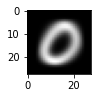

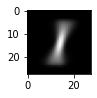

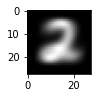

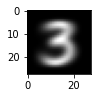

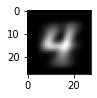

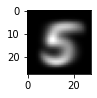

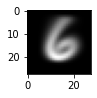

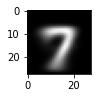

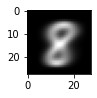

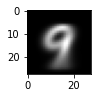

In [144]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
mean = np.zeros((10,28,28)) 

count =0;

#Calculate mean vector for each class
for i in range(10):
  count = 0
  for j in range(60000):
    if y_train[j] == i:
      mean[i] += x_train[j]
      count=count+1
  mean[i] = mean[i]/count


 
from matplotlib import pyplot
for i in range(10):  
  pyplot.subplot(330 + 1 + 1)
  pyplot.imshow(mean[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()
  #output below is the mean digits

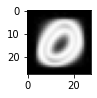

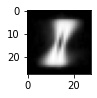

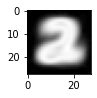

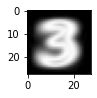

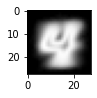

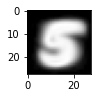

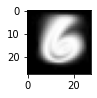

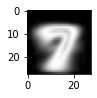

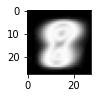

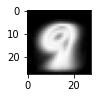

In [145]:
#Calculate the Standard Deviation vector for each class
std = np.zeros((10,28,28))
byclass = []
for i in range(10):
  use = []
  for j in range(60000):
    if y_train[j] == i:
      use.append(x_train[j])
  std[i] = np.std(use,axis=0)


for i in range(10):  
  pyplot.subplot(330 + 1 + 1)
  pyplot.imshow(std[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()
#output below is the Standard deviation digits

In [146]:
#Flatten train and test arrays for further calculations
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

mean = mean.reshape(10,784)

#Sigma = Covarience
#Covarience = (X−μ)(X−μ)T

add = np.zeros((784,784))
np.fill_diagonal(add, .01)
sigma = np.zeros((10,784,784))
for i in range(10):
  use = []
  for j in range(60000):
    if y_train[j] == i:
      use.append(x_train[j])
  sigma[i] = np.dot((use - mean[i]).T,(use - mean[i]))
  sigma[i] = sigma[i]/len(use)
  sigma[i] = sigma[i] + add

#this calculates the covariance for each class. each covariance for class i is stored in sigma[i]

In [147]:

#Discriminant function =−1/2(x−μi)′Σ−1i(x−μi)−d2log(2π)−12log|Σi|+logP(ωi)
y_pred = [None] *10000

for i in range(1000):
  max = -10000000
  for j in range(10):
    trmean = x_test[i] - mean[j] #trmean = ((x−μi))
    inv = np.linalg.inv(sigma[j]) #inv = Σ inverse 
    first = -.5*np.dot(trmean,np.dot(inv,trmean)) #first = −1/2(x−μi)′Σ−1i(x−μi)
    second = -784/2 * math.log(2*math.pi) #second = d/2log(2π)
    third =np.linalg.slogdet(sigma[j]) # third = -1/2log|Σi|
    third = third[1] *-.5
    forth = math.log(.1) # forth = logP(wi)
    df = first - second - third +forth #df =  =−1/2(x−μi)′Σ−1i(x−μi)−d2log(2π)−12log|Σi|+logP(ωi)
    if df>max:
      max = df
      y_pred[i] = j
  


#^^Iterates through each input and calculates the discrimiant value for each class. Classifies input based on which discrimant value is the largerst.


In [162]:
counter = 0
for i in range(1000):
  if y_pred[i] == y_test[i]:
    counter = counter+1
counter = counter/1000
counter = counter *100
print("Accuracy:")
print(counter)

Accuracy:
55.300000000000004
